In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
save_fig = True

In [31]:
plt.rcParams['figure.figsize'] = [7, 6]

if (save_fig): plt.rcParams['figure.figsize'] = [6, 5]

plt.rcParams['figure.constrained_layout.use'] = True

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelpad'] = 15

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['lines.markersize'] = 9
plt.rcParams['lines.linewidth'] = 2

In [49]:
# Number of spins.
N = 10 * 10 * 10 

In [50]:
cols = ['beta', 'energy', 'cv', 'ususceptibility', 'magnetization^2', 'n', 'n^2']

In [105]:
df = pd.read_csv('results_10x10x10.dat', skiprows=1, sep='\s+', names=cols).sort_values('beta', ascending=False)
df.head(1)

,beta,energy,cv,ususceptibility,magnetization^2,n,n^2
28,1.428571,-0.839508,0.420536,0.053727,0.002071,2.270725,5158.885842


# Energy

In [78]:
df_aux = pd.read_csv('ALPS_Energy.dat', sep='\s+')

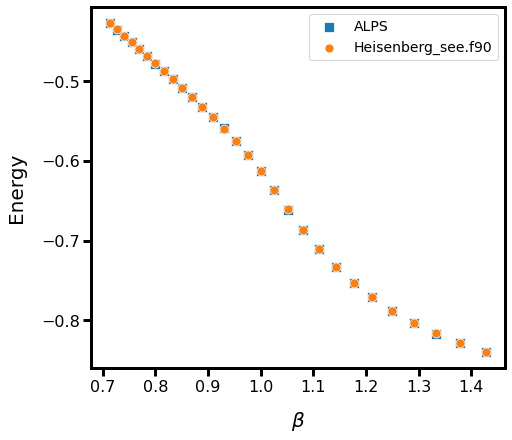

In [82]:
sns.scatterplot(data=df_aux, x='beta', y='Energy', label='ALPS', marker='s', s=100)
sns.scatterplot(data=df, x='beta', y='energy', label='Heisenberg_see.f90')

plt.xlabel(r'$\beta$')
plt.ylabel('Energy')

if (save_fig): plt.savefig('Energy.png')
plt.show()

# Susceptibility

In [84]:
df_aux = pd.read_csv('ALPS_Susceptibility.dat', sep='\s+')
df_aux['Susceptibility'] = df_aux['Susceptibility'] * N

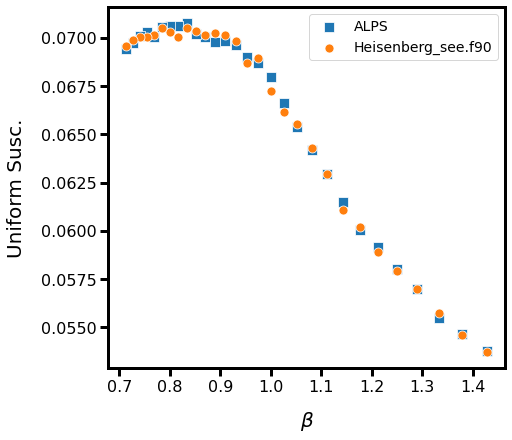

In [86]:
sns.scatterplot(data=df_aux, x='beta', y='Susceptibility', label='ALPS', marker='s', s=100)
sns.scatterplot(data=df, x='beta', y='ususceptibility', label='Heisenberg_see.f90')

plt.ylabel('Uniform Susc.')
plt.xlabel(r'$\beta$')
if (save_fig): plt.savefig('USusceptibility.png')
plt.show()

# Cv

In [88]:
df_aux = pd.merge(pd.read_csv('ALPS_n.dat', sep='\s+'), pd.read_csv('ALPS_n^2.dat', sep='\s+'))

In [89]:
df_aux['cv'] = (df_aux['n^2'] - df_aux['n'] * df_aux['n'] * N - df_aux['n'])

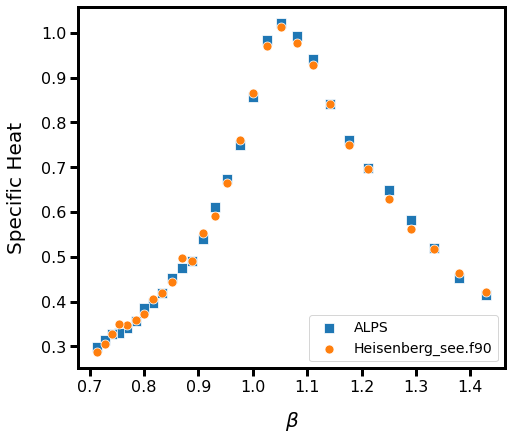

In [90]:
sns.scatterplot(data=df_aux, x='beta', y='cv', label='ALPS', marker='s', s=100)
sns.scatterplot(data=df, x='beta', y='cv', label='Heisenberg_see.f90')

plt.ylabel('Specific Heat')
plt.xlabel(r'$\beta$')
if (save_fig): plt.savefig('Cv.png')
plt.show()

# N^2

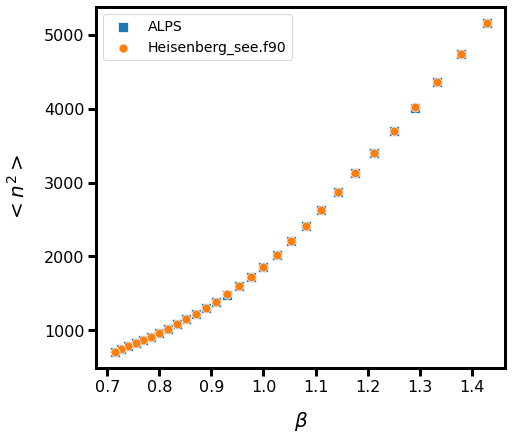

In [91]:
sns.scatterplot(data=df_aux, x='beta', y='n^2', label='ALPS', marker='s', s=100)
sns.scatterplot(data=df, x='beta', y='n^2', label='Heisenberg_see.f90')

plt.ylabel(r'$<n^2>$')
plt.xlabel(r'$\beta$')
if (save_fig): plt.savefig('n^2.png')
plt.show()

# N

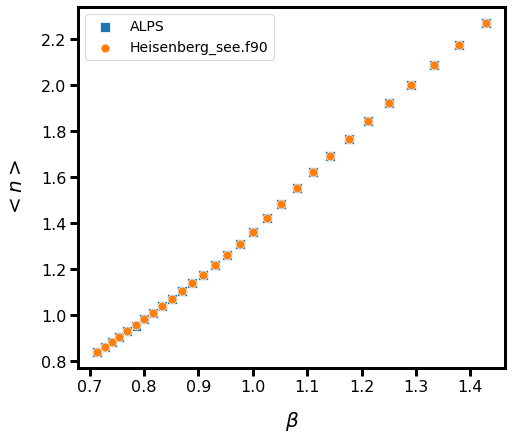

In [92]:
sns.scatterplot(data=df_aux, x='beta', y='n', label='ALPS', marker='s', s=100)
sns.scatterplot(data=df, x='beta', y='n', label='Heisenberg_see.f90')

plt.ylabel(r'$<n>$')
plt.xlabel(r'$\beta$')
if (save_fig): plt.savefig('n.png')
plt.show()

In [106]:
df2 = pd.read_csv('results_16x16x16.dat', skiprows=1, sep='\s+', names=cols).sort_values('beta', ascending=False)

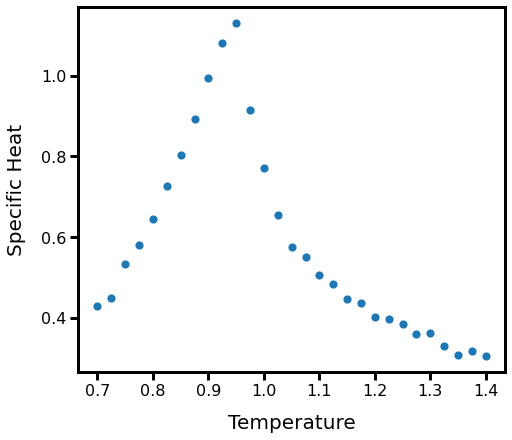

In [110]:
df2['temp'] = 1. / df2['beta']
sns.scatterplot(data=df2, x='temp', y='cv')
plt.xlabel('Temperature')
plt.ylabel('Specific Heat')
#plt.xlim(0, 1.45)
#plt.ylim(0, 1.2)
if (save_fig): plt.savefig('16x16x16.png')

plt.show()

In [65]:
df1 = pd.read_csv('dist_n_T=0.2000/dist_n_16x16x16_T=0.2000Nn=0.dat', skiprows=0, sep='\s+', header=None)
df2 = pd.read_csv('dist_n_T=0.2000/dist_n_16x16x16_T=0.2000Nn=100.dat', skiprows=0, sep='\s+', header=None)

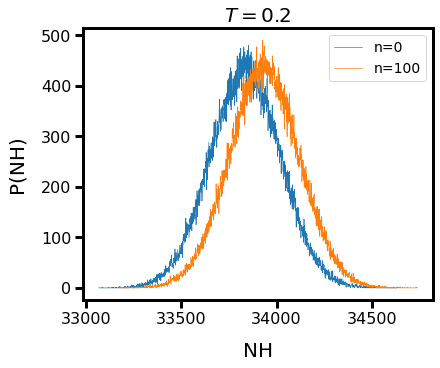

In [68]:
sns.lineplot(data=df1, x=df1[0], y=df1[1], linewidth=0.65, label='n=0')
sns.lineplot(data=df2, x=df2[0], y=df2[1], linewidth=0.65, label='n=100')
plt.title(r'$T = 0.2$')
plt.ylabel('P(NH)')
plt.xlabel('NH')
if (save_fig): plt.savefig('dist_NH_T=0.2.png')
plt.show()

In [69]:
df1 = pd.read_csv('dist_n_T=1.0500/dist_n_16x16x16_T=1.0500Nn=0.dat', skiprows=0, sep='\s+', header=None)
df2 = pd.read_csv('dist_n_T=1.0500/dist_n_16x16x16_T=1.0500Nn=100.dat', skiprows=0, sep='\s+', header=None)

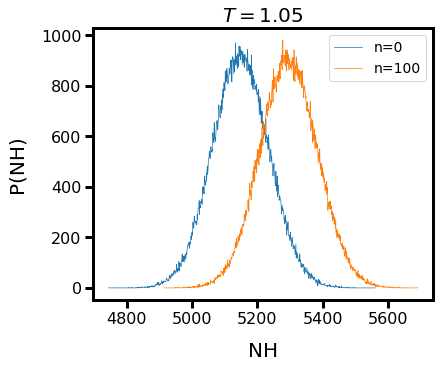

In [70]:
sns.lineplot(data=df1, x=df1[0], y=df1[1], linewidth=0.7, label='n=0')
sns.lineplot(data=df2, x=df2[0], y=df2[1], linewidth=0.7, label='n=100')
plt.title(r'$T = 1.05$')
plt.ylabel('P(NH)')
plt.xlabel('NH')
if (save_fig): plt.savefig('dist_NH_T=1.05.png')
plt.show()

In [71]:
df1 = pd.read_csv('dist_n_T=6.0000/dist_n_16x16x16_T=6.0000Nn=0.dat', skiprows=0, sep='\s+', header=None)
df2 = pd.read_csv('dist_n_T=6.0000/dist_n_16x16x16_T=6.0000Nn=100.dat', skiprows=0, sep='\s+', header=None)

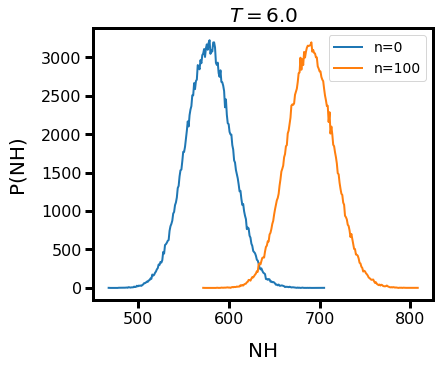

In [72]:
sns.lineplot(data=df1, x=df1[0], y=df1[1], label='n=0')
sns.lineplot(data=df2, x=df2[0], y=df2[1], label='n=100')
plt.title(r'$T = 6.0$')
plt.ylabel('P(NH)')
plt.xlabel('NH')
if (save_fig): plt.savefig('dist_NH_T=6.0.png')
plt.show()